In [4]:
import pandas as pd
from utils.addTimeInformation import addTimeInformation
from utils.calculateConsumption import calculateConsumption, getConsumptionYear, calculateConsumption_lastprofile
from utils.plotWeekDiagram import plotWeekDiagramm, create_week_comparison
from utils.read_CSV import getData
from utils.extraploation_class import Extrapolation

# VARIABLES
consumption_development_rate = 1.045
consumption_development_per_year = {
    2024: 1.045,
    2025: 1.03,
    2026: 1.0335,
    2027: 1.066,
    2028: 0.89,
    2029: 1.09,
    2030: 1.02
}
# VARIABLES END


consumption_existing_years = calculateConsumption(consumption_development_per_year)

Data für 2023 loaded succsessfully.


# Mit Lastprofilen

In [5]:
lastprofil_workday = pd.read_csv('CSV/Lastprofile/eMobilitaet/lastprofil_werktag.csv', delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]
lastprofil_saturday = pd.read_csv('CSV/Lastprofile/eMobilitaet/lastprofil_samstag.csv', delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]
lastprofil_sunday = pd.read_csv('CSV/Lastprofile/eMobilitaet/lastprofil_sonntag.csv', delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]

# Speichern der Lastprofile in einem Dictionary
lastprofile_dict = {
    'workday': lastprofil_workday,
    'saturday': lastprofil_saturday,
    'sunday': lastprofil_sunday
}


consumption_existing_years_lastprofile = calculateConsumption_lastprofile(consumption_development_per_year, lastprofile_dict)

Data für 2023 loaded succsessfully.


                    Datum  Gesamtverbrauch
14012 2024-05-27 00:00:00         10157.25
14013 2024-05-27 00:15:00          9930.25
14014 2024-05-27 00:30:00          9831.00
14015 2024-05-27 00:45:00          9710.50
14016 2024-05-27 01:00:00          9638.25
...                   ...              ...
14679 2024-06-02 22:45:00         11313.00
14680 2024-06-02 23:00:00         11075.50
14681 2024-06-02 23:15:00         10846.25
14682 2024-06-02 23:30:00         10645.50
14683 2024-06-02 23:45:00         10449.75

[672 rows x 2 columns]
                    Datum  Gesamtverbrauch
14012 2024-05-27 00:00:00     10270.939819
14013 2024-05-27 00:15:00     10030.457288
14014 2024-05-27 00:30:00      9917.724757
14015 2024-05-27 00:45:00      9783.742226
14016 2024-05-27 01:00:00      9698.009694
...                   ...              ...
14679 2024-06-02 22:45:00     11437.992585
14680 2024-06-02 23:00:00     11194.872884
14681 2024-06-02 23:15:00     10958.840485
14682 2024-06-02 23:30:00     

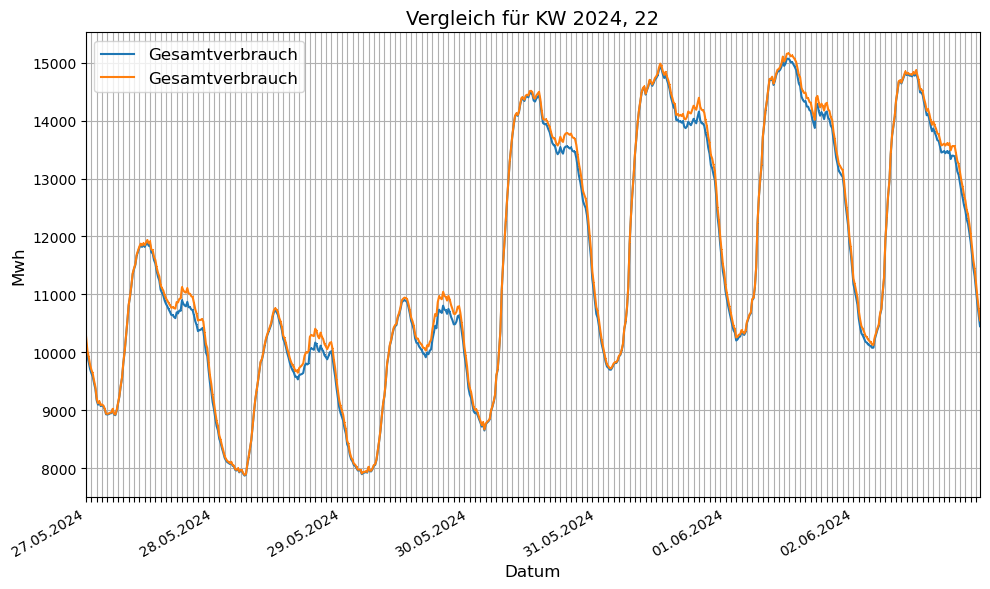

In [6]:
selected_week = '22'
selected_year = '2024'



def get_weekly_consumption(consumption_data, selected_year, selected_week):
    # Erstelle einen DataFrame aus dem Dictionary
    yearly_consumption = pd.DataFrame.from_dict(consumption_data.get(int(selected_year)))

    # Filtere die Daten für die angegebene Woche und das Jahr
    week_filtered_data_consumption = yearly_consumption[
        (yearly_consumption['Week'] == selected_week)
    ]

    # Erstelle einen DataFrame nur mit Datum und Gesamtverbrauch
    week_consumption_df = week_filtered_data_consumption[['Datum', 'Gesamtverbrauch']]
    week_consumption_df.loc[:, 'Datum'] = pd.to_datetime(week_consumption_df['Datum'])

    return week_consumption_df


# Verwende die Funktion für consumption_existing_years
week_consumption_df = get_weekly_consumption(consumption_existing_years, selected_year, selected_week)

# Verwende die Funktion für consumption_existing_years_lastprofile
week_consumption_df_lp = get_weekly_consumption(consumption_existing_years_lastprofile, selected_year, selected_week)

print(week_consumption_df)
print(week_consumption_df_lp)

# didirectory_yearly_generation and consumption_existing_years are dicitionaries

create_week_comparison(selected_week, selected_year, week_consumption_df, week_consumption_df_lp)